In [5]:
!pip install matplotlib

In [70]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [72]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [73]:
## Generate Random World Cities
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [74]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

771


# We will need to do the following PSEUDOCODE

### Import our dependencies and initialize counters and an empty list that will hold the weather data.
### Loop through the cities list.
### Group the cities in sets of 50 to log the process as we find the weather data for each city.
### Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
### Build the city_url or endpoint for each city.
### Log the URL and the record and set numbers.
### Make an API request for each city.
### Parse the JSON weather data for the following:
### City, country, and date
### Latitude and longitude
### Maximum temperature
### Humidity
### Cloudiness
### Wind speed
### Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [75]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [76]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [77]:
query_url = url + "appid=" + "&q" + city + "d3437785ee7480186a2edfa50ee6c8f4" 

In [78]:
# # weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [79]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [80]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | udachnyy
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | raudeberg
Processing Record 6 of Set 1 | gilgit
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | mehamn
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | chiconautla
City not found. Skipping...
Processing Record 15 of Set 1 | baykit
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | harrismith
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | antofagasta
Processing Record 22 of Set 1 | tiks

Processing Record 38 of Set 4 | nikolayevsk-na-amure
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | benguela
Processing Record 41 of Set 4 | gori
Processing Record 42 of Set 4 | paamiut
Processing Record 43 of Set 4 | bela
Processing Record 44 of Set 4 | kita
Processing Record 45 of Set 4 | fonte boa
Processing Record 46 of Set 4 | flin flon
Processing Record 47 of Set 4 | trebinje
Processing Record 48 of Set 4 | bambanglipuro
Processing Record 49 of Set 4 | pangkalanbuun
Processing Record 50 of Set 4 | port keats
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | jalu
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | nortelandia
Processing Record 7 of Set 5 | treinta y tres
Processing Record 8 of Set 5 | touros
Processing Record 9 of Set 5 | kalmunai
Processing Record 10 of Set 5 | tilichiki
Processing Record 11 of Set 5 | khatanga
Processing Re

Processing Record 29 of Set 8 | pundaguitan
Processing Record 30 of Set 8 | bakchar
Processing Record 31 of Set 8 | yingcheng
Processing Record 32 of Set 8 | trairi
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | soe
Processing Record 36 of Set 8 | nova venecia
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | moose factory
Processing Record 41 of Set 8 | sakakah
Processing Record 42 of Set 8 | mattru
Processing Record 43 of Set 8 | griffith
Processing Record 44 of Set 8 | chagda
City not found. Skipping...
Processing Record 45 of Set 8 | santa isabel do rio negro
Processing Record 46 of Set 8 | ban nahin
Processing Record 47 of Set 8 | calobre
City not found. Skipping...
Processing Record 48 of Set 8 | clyde river
Processing Record 49 of Set 8 | lagunas
Processing Record 50 of Set 8 | acarau
Processing Record 1 of

Processing Record 21 of Set 12 | alexandria
Processing Record 22 of Set 12 | auki
Processing Record 23 of Set 12 | kentau
Processing Record 24 of Set 12 | khonuu
City not found. Skipping...
Processing Record 25 of Set 12 | bagdarin
Processing Record 26 of Set 12 | bahia honda
Processing Record 27 of Set 12 | kroonstad
Processing Record 28 of Set 12 | baena
Processing Record 29 of Set 12 | shiraz
Processing Record 30 of Set 12 | peniche
Processing Record 31 of Set 12 | satitoa
City not found. Skipping...
Processing Record 32 of Set 12 | batagay-alyta
Processing Record 33 of Set 12 | voskresenskoye
Processing Record 34 of Set 12 | mount isa
Processing Record 35 of Set 12 | kuryk
Processing Record 36 of Set 12 | alangudi
Processing Record 37 of Set 12 | pacific grove
Processing Record 38 of Set 12 | jati
Processing Record 39 of Set 12 | grand gaube
Processing Record 40 of Set 12 | nantucket
Processing Record 41 of Set 12 | bossembele
City not found. Skipping...
Processing Record 42 of Set

Processing Record 4 of Set 16 | nashville
Processing Record 5 of Set 16 | martapura
Processing Record 6 of Set 16 | rio gallegos
Processing Record 7 of Set 16 | benicarlo
Processing Record 8 of Set 16 | praia da vitoria
Processing Record 9 of Set 16 | billings
Processing Record 10 of Set 16 | panama city
Processing Record 11 of Set 16 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 12 of Set 16 | monkey bay
Processing Record 13 of Set 16 | kochubeyevskoye
Processing Record 14 of Set 16 | kirkwood
Processing Record 15 of Set 16 | pangai
Processing Record 16 of Set 16 | chara
Processing Record 17 of Set 16 | tupik
Processing Record 18 of Set 16 | nizwa
Processing Record 19 of Set 16 | asayita
City not found. Skipping...
Processing Record 20 of Set 16 | shu
Processing Record 21 of Set 16 | assare
-----------------------------
Data Retrieval Complete      
-----------------------------


### Create a DataFrame of City Weather Data. 
#### Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

##### Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries)

In [81]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,70.00,64,0,8.12,ZA,2020-10-22 07:37:23
1,Yellowknife,62.46,-114.35,21.99,92,75,5.82,CA,2020-10-22 07:36:50
2,Udachnyy,66.42,112.40,5.00,92,90,2.24,RU,2020-10-22 07:36:03
3,Lorengau,-2.02,147.27,82.35,73,76,4.23,PG,2020-10-22 07:37:24
4,Raudeberg,61.99,5.14,43.00,78,82,22.57,NO,2020-10-22 07:37:24
5,Gilgit,35.92,74.31,68.34,20,0,1.16,PK,2020-10-22 07:37:24
6,Ushuaia,-54.80,-68.30,42.80,70,75,3.36,AR,2020-10-22 07:37:24
7,Thompson,55.74,-97.86,23.00,85,90,3.36,CA,2020-10-22 07:37:24
8,Puerto Ayora,-0.74,-90.35,66.99,94,99,4.00,EC,2020-10-22 07:37:25
9,Kaitangata,-46.28,169.85,52.00,83,100,8.01,NZ,2020-10-22 07:37:25


### Format the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
#### Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear: new_column_order = ["column2", "column4", "column1"]; Then, we assign a new or the same DataFrame with new column order: 
### df = df[new_column_order]

In [82]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp",'Humidity',"Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-10-22 07:37:23,-34.42,19.23,70.00,64,0,8.12
1,Yellowknife,CA,2020-10-22 07:36:50,62.46,-114.35,21.99,92,75,5.82
2,Udachnyy,RU,2020-10-22 07:36:03,66.42,112.40,5.00,92,90,2.24
3,Lorengau,PG,2020-10-22 07:37:24,-2.02,147.27,82.35,73,76,4.23
4,Raudeberg,NO,2020-10-22 07:37:24,61.99,5.14,43.00,78,82,22.57
5,Gilgit,PK,2020-10-22 07:37:24,35.92,74.31,68.34,20,0,1.16
6,Ushuaia,AR,2020-10-22 07:37:24,-54.80,-68.30,42.80,70,75,3.36
7,Thompson,CA,2020-10-22 07:37:24,55.74,-97.86,23.00,85,90,3.36
8,Puerto Ayora,EC,2020-10-22 07:37:25,-0.74,-90.35,66.99,94,99,4.00
9,Kaitangata,NZ,2020-10-22 07:37:25,-46.28,169.85,52.00,83,100,8.01


In [83]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature
### Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

In [84]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [85]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# # File to Load
# city_data_to_load = "weather_data/city_data.csv"
# # ride_data_to_load = "weather_data/ride_data.csv"

# # Read the City and Ride Data
# city_data_df = pd.read_csv(city_data_to_load)
# # ride_data_df = pd.read_csv(ride_data_to_load)

In [86]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/22/20'

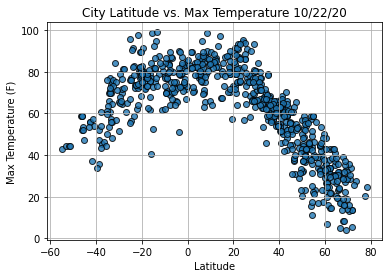

In [87]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

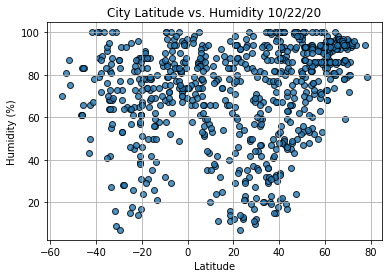

In [88]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

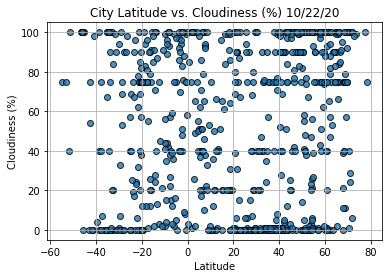

In [89]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

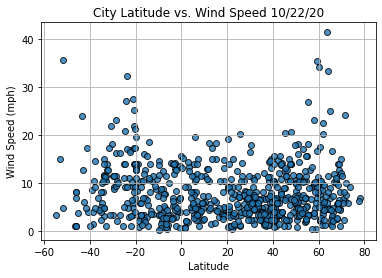

In [90]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [91]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Use Linear Regression to Find the Relationship Between Variables


In [92]:
index13 = city_data_df.loc[13]
index13

City                       Baykit
Country                        RU
Date          2020-10-22 07:37:25
Lat                         61.67
Lng                         96.37
Max Temp                    37.63
Humidity                       87
Cloudiness                    100
Wind Speed                   5.35
Name: 13, dtype: object

In [93]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
704     True
705     True
706     True
707     True
708    False
Name: Lat, Length: 709, dtype: bool

In [94]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-10-22 07:37:23,-34.42,19.23,70.00,64,0,8.12
1,Yellowknife,CA,2020-10-22 07:36:50,62.46,-114.35,21.99,92,75,5.82
2,Udachnyy,RU,2020-10-22 07:36:03,66.42,112.40,5.00,92,90,2.24
3,Lorengau,PG,2020-10-22 07:37:24,-2.02,147.27,82.35,73,76,4.23
4,Raudeberg,NO,2020-10-22 07:37:24,61.99,5.14,43.00,78,82,22.57


In [95]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \n
                    for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-96-7e7639d0ce84>, line 6)

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Find the Correlation Between Latitude and Percent Humidity

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

## Find the Correlation Between Latitude and Percent Cloudiness

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                   for % Cloudiness', '% Cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

In [ ]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

## Create Heatmaps for Weather Parameters